In [1]:
import warnings; 
warnings.simplefilter('ignore')

# 0. Instalar e Importar Facebook Prophet

In [ ]:
%pip install pystan
%pip install fbprophet

In [53]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plot

# 1. Importación Series Temporales de las Features

In [54]:
serie_dolares = pd.read_excel(r'./serie_dolares.xlsx').loc[:,['date','dolar_oficial']]
serie_feriados = pd.read_excel(r'./serie_feriados.xlsx').loc[:,['date','is_working']]
serie_tempertura = pd.read_excel(r'./serie_temperatura.xlsx').loc[:,['date','temperature_C']]
serie_uv = pd.read_excel(r'./serie_uv.xlsx').loc[:,['date','uv_index']]

In [55]:
serie_dolares.columns = ['ds','y']
serie_feriados.columns = ['ds','y']
serie_tempertura.columns = ['ds','y']
serie_uv.columns = ['ds','y']

# 2. Predicciones con Prophet

## 2.1 Temperatura

In [56]:
modelo_temperatura = Prophet(interval_width=0.95, daily_seasonality=True)
modelo_temperatura.fit(serie_tempertura)

20:34:30 - cmdstanpy - INFO - Chain [1] start processing
20:34:31 - cmdstanpy - INFO - Chain [1] done processing


con .make_future_dataframe genero dataframe con las fechas desde 2007 hasta 3 años después del 11/6/2023 (el horizonte de prediccion)

In [57]:
future = modelo_temperatura.make_future_dataframe(periods=1827)
future

,ds
0,2007-01-01
1,2007-01-02
2,2007-01-03
3,2007-01-04
4,2007-01-05
...,...
7828,2028-06-07
7829,2028-06-08
7830,2028-06-09
7831,2028-06-10


In [63]:
forecast = modelo_temperatura.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_excel(r'./predicciones_features//forecast_temp.xlsx')
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2007-01-01,24.889433,18.808682,30.917798
1,2007-01-02,24.940286,18.596439,31.073069
2,2007-01-03,25.093454,18.979525,31.341584
3,2007-01-04,25.108593,18.686229,31.119754
4,2007-01-05,25.089544,19.347732,31.301174
...,...,...,...,...
7828,2028-06-07,13.843640,7.680337,20.417407
7829,2028-06-08,13.733281,7.841955,20.130829
7830,2028-06-09,13.601843,7.595153,19.748569
7831,2028-06-10,13.564107,7.354122,20.107728


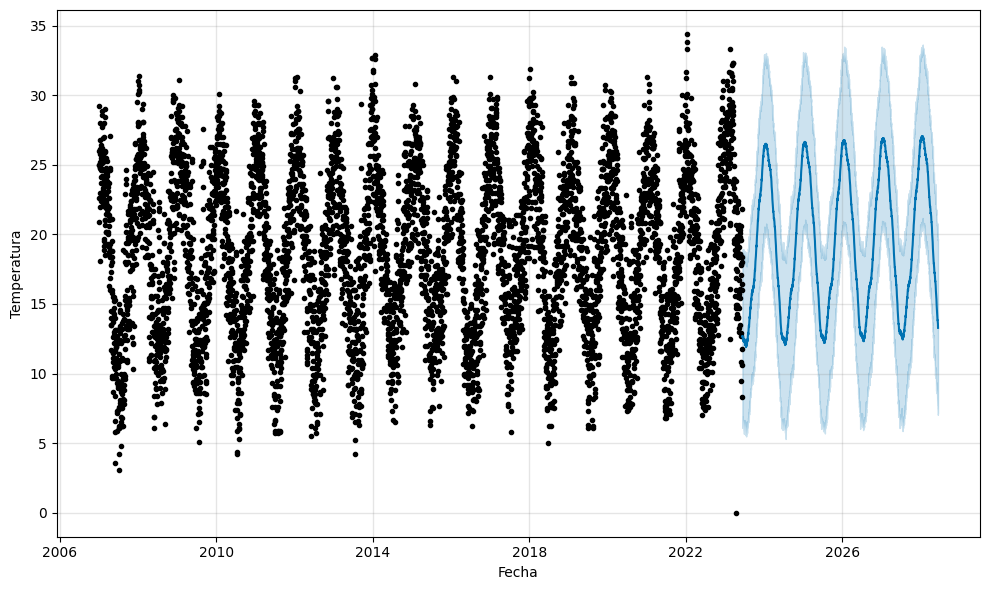

In [60]:
fig1 = modelo_temperatura.plot(forecast[forecast['ds'] > '2023-06-11'], xlabel='Fecha', ylabel='Temperatura')

## 2.2 Valor Dólar Oficial

In [64]:
modelo_dolar = Prophet()
modelo_dolar.fit(serie_dolares)

20:43:25 - cmdstanpy - INFO - Chain [1] start processing
20:43:27 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
forecast = modelo_dolar.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_excel(r'./predicciones_features//forecast_dolar.xlsx')
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2007-01-01,2.879755,-8.492759,13.111689
1,2007-01-02,2.916410,-7.765303,12.751675
2,2007-01-03,2.961085,-6.733621,14.524269
3,2007-01-04,2.996256,-7.216381,13.366815
4,2007-01-05,3.011053,-7.547438,14.013462
...,...,...,...,...
7828,2028-06-07,389.567989,341.423842,435.567066
7829,2028-06-08,389.509645,340.398711,434.720971
7830,2028-06-09,389.424912,340.401471,435.613624
7831,2028-06-10,389.303673,341.317662,436.406765


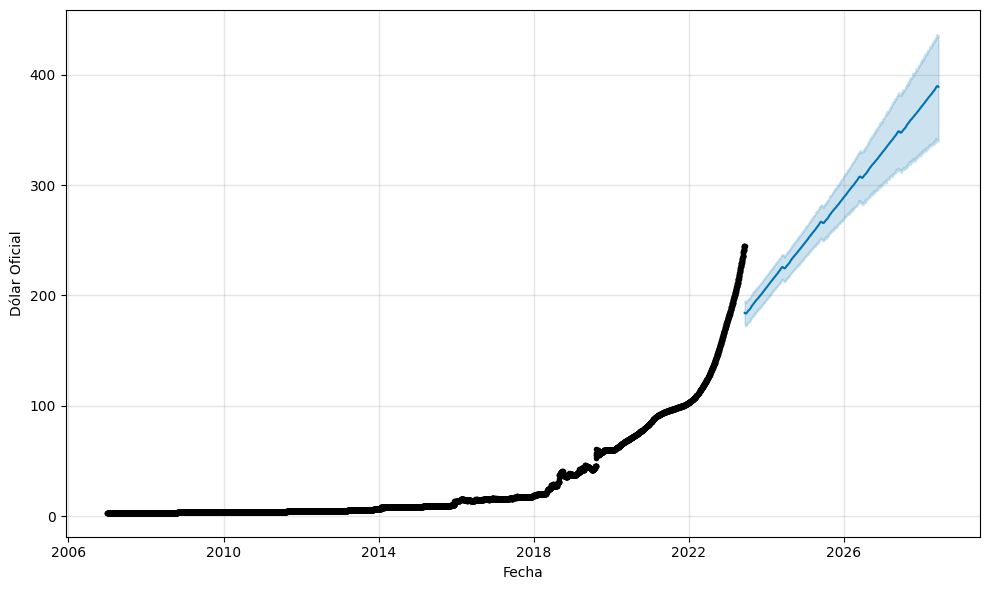

In [66]:
fig1 = modelo_dolar.plot(forecast[forecast['ds'] > '2023-06-11'], xlabel='Fecha', ylabel='Dólar Oficial')

## 2.3 Feriados (Indicador de día hábil)

In [81]:
feriados_inamovibles = pd.read_excel(r'./feriados_inamovibles.xlsx')
feriados_inamovibles

,día
0,2023-01-01
1,2023-02-20
2,2023-02-21
3,2023-03-24
4,2023-04-02
5,2023-04-07
6,2023-05-01
7,2023-05-25
8,2023-06-20
9,2023-07-09


In [82]:
feriados_inamovibles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   día     15 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 248.0 bytes


In [107]:
feriados_futuro = future[future['ds'] > '2023-06-11']
feriados_futuro['is_working'] = 1
feriados_futuro.columns =  ['fecha','is_working']
feriados_futuro

,fecha,is_working
6006,2023-06-12,1
6007,2023-06-13,1
6008,2023-06-14,1
6009,2023-06-15,1
6010,2023-06-16,1
...,...,...
7828,2028-06-07,1
7829,2028-06-08,1
7830,2028-06-09,1
7831,2028-06-10,1


In [125]:
import pandas as pd

# Suponiendo que tienes los DataFrames feriados_inamovibles y feriados_futuro
# Asegúrate de que las columnas de fecha estén en formato datetime

# Convertir las fechas de feriados_inamovibles a formato mes-día (sin año)
feriados_inamovibles['mes_dia'] = feriados_inamovibles['día'].dt.strftime('%m-%d')

# Función para verificar si un día es no laborable
def es_no_laborable(fecha):
    # Obtener el mes y el día de la fecha
    mes_dia_fecha = fecha.strftime('%m-%d')
    
    # Verificar si el mes y el día están en feriados_inamovibles o si es sábado o domingo
    if mes_dia_fecha in feriados_inamovibles['mes_dia'].values:
        return 0  # No laborable
    elif fecha.weekday() >= 5:
        return 0  # No laborable (sábado o domingo)
    else:
        return 1  # Laborable

# Aplicar la función a la columna 'fecha' en feriados_futuro y crear la columna 'is_working'
feriados_futuro['is_working'] = feriados_futuro['fecha'].apply(es_no_laborable)

# # Eliminar la columna temporal 'mes_dia' de feriados_inamovibles si ya no es necesaria
# feriados_inamovibles.drop(columns=['mes_dia'], inplace=True)

# Verificar los resultados
feriados_futuro.reset_index(drop=True, inplace=True)
feriados_futuro


,fecha,is_working
0,2023-06-12,1
1,2023-06-13,1
2,2023-06-14,1
3,2023-06-15,1
4,2023-06-16,1
...,...,...
1822,2028-06-07,1
1823,2028-06-08,1
1824,2028-06-09,1
1825,2028-06-10,0


In [134]:
# para chequear
feriados_futuro[feriados_futuro['fecha'] == '2028-01-01']   

,fecha,is_working
1664,2028-01-01,0


In [135]:
feriados_futuro.to_excel(r'./predicciones_features//feriados_futuro.xlsx')